(79, 2) (20, 2)
(79,) (20,)
(99, 2)
(99, 1)


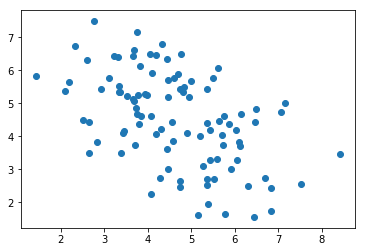

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
import numpy as np
import random
%matplotlib inline

dfx= pd.read_csv(r'C:\Users\hershey\Desktop\ML\logistic\logisticX.csv.txt')
dfy= pd.read_csv(r'C:\Users\hershey\Desktop\ML\logistic\logisticY.csv.txt')
X= dfx.values 
Y= dfy.values

split = int(0.8*X.shape[0])
X_train = X[:split,:]
X_test = X[split:,:]

Y_train = Y[:split,-1]
Y_test  = Y[split:,-1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

print(X.shape)
print(Y.shape)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [175]:
def hypothesis(x,w,b):
    h= np.dot(x,w)+b
    return sigmoid(h)


In [176]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))


In [177]:
def error(y_true,x,w,b):
    m= X_train.shape[0]
    err=0.0
    for i in range (m):
            hx= hypothesis(x[i],w,b)
            err+= y_true[i]*np.log2(hx) + (1-y_true[i])*np.log2(1-hx)
    return -err/m


In [178]:
def get_grads(y_true,x,w,b):
    
    m= X_train.shape[0]
    grad_w=np.zeros(w.shape)
    grad_b=0.0
    for i in range (m):
        hx= hypothesis(X[i],w,b)
            
        grad_w+=-1*(y_true[i]-hx)*X[i]
        grad_b+=-1*(y_true[i]-hx)
              
    grad_w/=m      
    grad_b/=m
    return [grad_w,grad_b]
    

In [179]:
def grad_ascent(x,y_true,w,b,learning_rate=0.1):
    err= error(y_true,x,w,b)
    [grad_w,grad_b]= get_grads(y_true,x,w,b)
    w=w+learning_rate*grad_w
    b=b+learning_rate*grad_b
    
    return err,w,b
    
def predict(x,w,b):
    
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1
    
def get_acc(x_tst,y_tst,w,b):
    
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]    

In [180]:
loss=[]
acc=[]
w= 2*np.random.random((X.shape[1],))
b= 5*np.random.random()

for i in range(79):
    l,w,b = grad_ascent(X_train,Y_train,w,b,learning_rate=0.1)
    acc.append(get_acc(X_test,Y_test,w,b))
    loss.append(l)

C:\Users\hershey\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log2
  
C:\Users\hershey\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


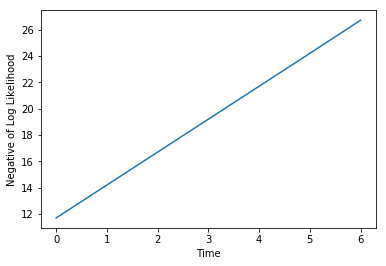

In [181]:
plt.plot(loss)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.show()